# Loading Images
First, let's load some images

In [53]:
from os import listdir
from PIL import Image as PImage
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [54]:
def loadImages(path):
    imagesList = listdir(path)
    imagesList.sort()
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)

    return loadedImages, imagesList

path="images/"
imageNames = []

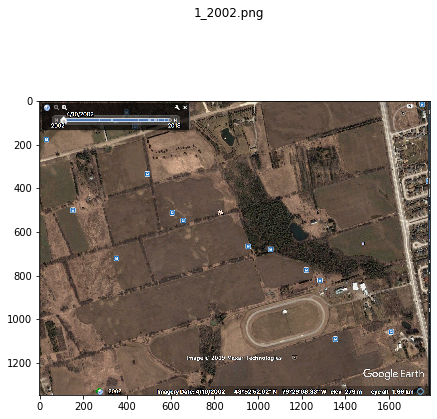

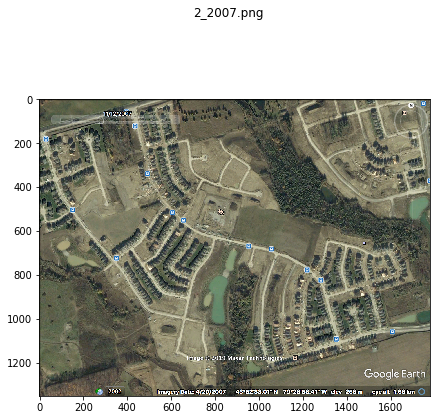

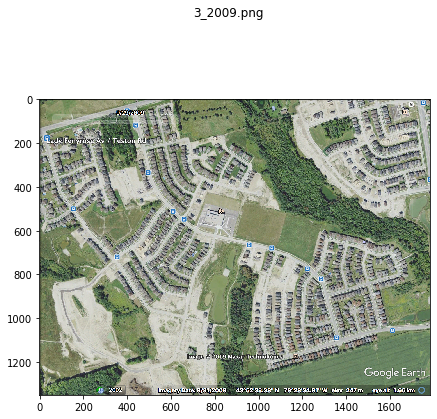

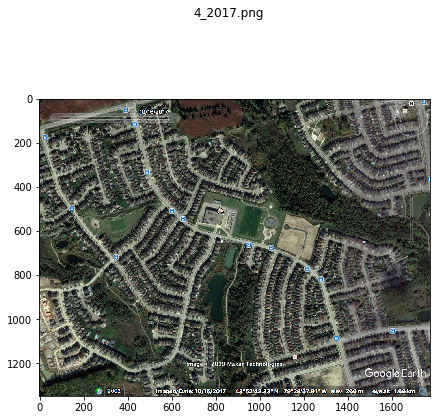

In [63]:
imgs, imageNames = loadImages(path)

for i in range(len(imgs)):
    plt.figure(figsize=(7,7)).suptitle(imageNames[i]) 
    plt.imshow(imgs[i])
    plt.show()


In [64]:
def blackAndWhite(imgs):
    newImages = []
    for img in imgs:
        newImages.append(img.convert('LA'))
    return newImages

In [65]:
blackAndWhilte = blackAndWhite(imgs)

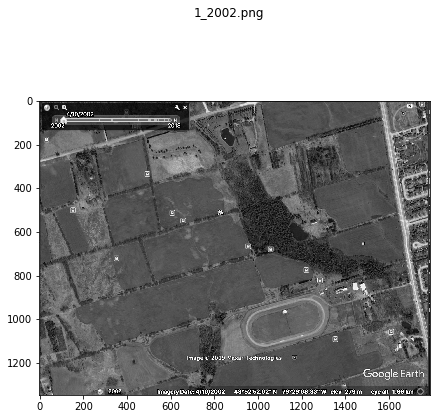

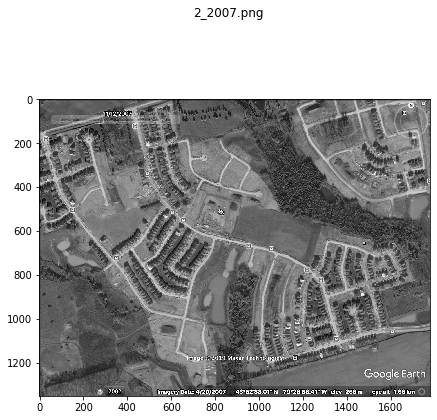

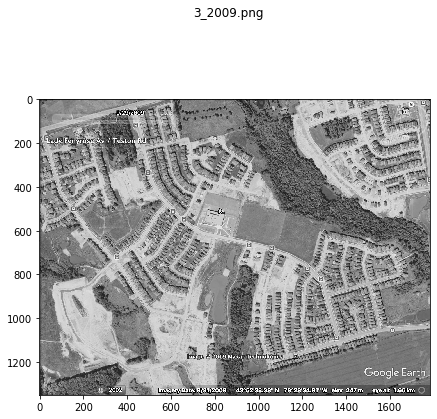

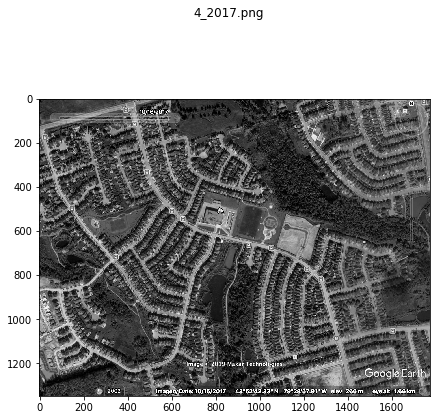

In [66]:
for i in range(len(blackAndWhilte)):
    plt.figure(figsize=(7,7)).suptitle(imageNames[i]) 
    plt.imshow(blackAndWhilte[i])
    plt.show()

# Let's only take one image and try to detect the roads in it

1. Gaussian filter applied to the grayscale. The kernel size used is 5.
2. Canny edge detection algorithm applied to the gaussian result using thresholds 50 and 150.
3. Hough lines extracted from the canny edge image using the following parameters:

rho = 1 # distance resolution in pixels of the Hough grid theta = np.pi/180 # angular resolution in radians of the Hough grid threshold = 20 # minimum number of votes (intersections in Hough grid cell) min_line_length = 30 #minimum number of pixels making up a line max_line_gap = 3 # maximum gap in pixels between connectable line segments 5. Applied a region of interest mask to the image so that only the interesting lines are shown.